#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [5]:
import pandas as pd
print(df.duplicated().value_counts())

False    147
True       3
dtype: int64


In [6]:
df.drop_duplicates(keep='first',inplace = True)
sum(df.duplicated())

0

Periksa apakah ada missing values

In [7]:
import pandas as pd
import seaborn as sns
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['sepal_length'] = lb.fit_transform(df['sepal_length'])
df['sepal_width'] = lb.fit_transform(df['sepal_width'])
df['petal_length'] = lb.fit_transform(df['petal_length'])
df['petal_width'] = lb.fit_transform(df['petal_width'])
df['species'] = lb.fit_transform(df['species'])


Periksa outlier dengan boxplot untuk setiap kolom feature

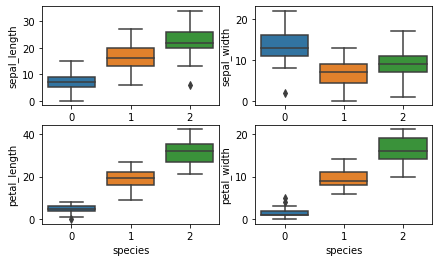

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(7,4))
sns.boxplot(ax=axes[0, 0], data=df, x='species', y='sepal_length')
sns.boxplot(ax=axes[0, 1], data=df, x='species', y='sepal_width')
sns.boxplot(ax=axes[1, 0], data=df, x='species', y='petal_length')
sns.boxplot(ax=axes[1, 1], data=df, x='species', y='petal_width')
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [10]:
# Independent Variabel
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

# Dependent Variabel
y = df[['species']]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

Uji model dengan dataset test

In [9]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa']


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 0 7]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# fit the model
model.fit(X_train, y_train)

C:\Users\alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Uji hasil model dengan data test

In [12]:
y_pred = model.predict(X_test)
print(y_pred)


['setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 0 7]]
Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [19]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

C:\Users\alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [20]:
y_pred = model.predict(X_test)
print(y_pred)

['setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[4 0 0]
 [0 4 0]
 [0 0 7]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [ ]:
ke 3 model memiliki akurasi yang sama